<a href="https://colab.research.google.com/github/VarleiDeCesare/satisfacao_passageiros_voo_IA/blob/master/Analise_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8.27)})

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.columns = ["Id", "genero", "idade", "tipo_cliente", "tipo_voo", "classe",
              "distancia_voo", "atraso_partida", "atraso_chegada",
              "conveniencia_hora_partida_chegada", "facilidade_reserva_online",
              "servico_checkin", "embarque_online", "localizacao_portao",
              "servico_bordo", "conforto_assento", "servico_quarto_pernas",
              "limpeza", "comida_bebida", "servico_voo", "servico_wifi_voo",
              "entreterimento_voo", "manuseio_bagagem", "satisfacao"]

In [ ]:
df.describe()

,Id,idade,distancia_voo,atraso_partida,atraso_chegada,conveniencia_hora_partida_chegada,facilidade_reserva_online,servico_checkin,embarque_online,localizacao_portao,servico_bordo,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df

,Id,genero,idade,tipo_cliente,tipo_voo,classe,distancia_voo,atraso_partida,atraso_chegada,conveniencia_hora_partida_chegada,...,servico_bordo,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem,satisfacao
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [ ]:
df['satisfacao'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: satisfacao, dtype: int64

# Naive Bayes


In [ ]:
print('shape:', df.shape)
df.head()

shape: (129880, 24)


,Id,genero,idade,tipo_cliente,tipo_voo,classe,distancia_voo,atraso_partida,atraso_chegada,conveniencia_hora_partida_chegada,...,servico_bordo,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem,satisfacao
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# removendo id para analise

df_naive = df.drop(['Id'], axis=1)

In [ ]:
# Analisando o summary do dataset

df_naive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   genero                             129880 non-null  object 
 1   idade                              129880 non-null  int64  
 2   tipo_cliente                       129880 non-null  object 
 3   tipo_voo                           129880 non-null  object 
 4   classe                             129880 non-null  object 
 5   distancia_voo                      129880 non-null  int64  
 6   atraso_partida                     129880 non-null  int64  
 7   atraso_chegada                     129487 non-null  float64
 8   conveniencia_hora_partida_chegada  129880 non-null  int64  
 9   facilidade_reserva_online          129880 non-null  int64  
 10  servico_checkin                    129880 non-null  int64  
 11  embarque_online                    1298

In [ ]:
# Encontrando variaveis categoricas

categorical = [var for var in df_naive.columns if df_naive[var].dtype=='O']
print(f'Possui {len(categorical)} variaveis categoricas\n')
print(f'Os valores são:\n{categorical}')

# df_naive[categorical].head()
# checando se ha valores vazios nas variaveis categoricas
categorical_null = df_naive[categorical].isnull().sum()

for value in categorical_null:
  if value!=0: cat_is_null = value
print('Há categoricos nulos:', cat_is_null)

Possui 5 variaveis categoricas

Os valores são:
['genero', 'tipo_cliente', 'tipo_voo', 'classe', 'satisfacao']
Há categoricos nulos: False


In [ ]:
# Explorando variaveis numericas

numerical = [var for var in df_naive.columns if df_naive[var].dtype!='O']
print(f'Possui {len(numerical)} variaveis numerical\n')
print(f'Os valores são:\n{numerical}')

# df_naive[numerical].head()
# checando se ha valores vazios nas variaveis numericas

numerical_null = df_naive[numerical].isnull().sum()
for value in numerical_null:
  if value!=0: num_is_null = value
print('Há numericos nulos:', num_is_null)

Possui 18 variaveis numerical

Os valores são:
['idade', 'distancia_voo', 'atraso_partida', 'atraso_chegada', 'conveniencia_hora_partida_chegada', 'facilidade_reserva_online', 'servico_checkin', 'embarque_online', 'localizacao_portao', 'servico_bordo', 'conforto_assento', 'servico_quarto_pernas', 'limpeza', 'comida_bebida', 'servico_voo', 'servico_wifi_voo', 'entreterimento_voo', 'manuseio_bagagem']
Há numericos nulos: 393


In [ ]:
# os valores faltantes estao na coluna atraso_chegada
# o que indica que nao foi registrado atraso na chegada
# portanto substituiremos por 0

df_naive['atraso_chegada'].fillna(0, inplace=True)

df_naive[numerical].isnull().sum()

idade                                0
distancia_voo                        0
atraso_partida                       0
atraso_chegada                       0
conveniencia_hora_partida_chegada    0
facilidade_reserva_online            0
servico_checkin                      0
embarque_online                      0
localizacao_portao                   0
servico_bordo                        0
conforto_assento                     0
servico_quarto_pernas                0
limpeza                              0
comida_bebida                        0
servico_voo                          0
servico_wifi_voo                     0
entreterimento_voo                   0
manuseio_bagagem                     0
dtype: int64

In [ ]:
# declarando tipo do cliente como alvo

X = df_naive.drop(['tipo_cliente'], axis=1)
y = df_naive['tipo_cliente']

# dividindo X e y em training e testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((90916, 22), (38964, 22))

In [ ]:
# setando novamente valores numericos e categoricos
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [ ]:
# verificando valores faltantes

print(X_train.isnull().sum(),f'\n{X_test.isnull().sum()}')

genero                               0
idade                                0
tipo_voo                             0
classe                               0
distancia_voo                        0
atraso_partida                       0
atraso_chegada                       0
conveniencia_hora_partida_chegada    0
facilidade_reserva_online            0
servico_checkin                      0
embarque_online                      0
localizacao_portao                   0
servico_bordo                        0
conforto_assento                     0
servico_quarto_pernas                0
limpeza                              0
comida_bebida                        0
servico_voo                          0
servico_wifi_voo                     0
entreterimento_voo                   0
manuseio_bagagem                     0
satisfacao                           0
dtype: int64 
genero                               0
idade                                0
tipo_voo                             0
classe     

In [ ]:
X_train[categorical].head()

,genero,tipo_voo,classe,satisfacao
13236,Male,Business,Economy,Neutral or Dissatisfied
69839,Female,Business,Economy,Satisfied
107468,Male,Personal,Economy,Neutral or Dissatisfied
49148,Female,Business,Economy,Satisfied
40165,Male,Business,Economy,Neutral or Dissatisfied


In [ ]:
# importando category encoders

!pip install category-encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# encode valores restantes com one-hot encoding
encoder = ce.OneHotEncoder(cols=['genero', 'tipo_voo',
                                 'classe', 'satisfacao'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [ ]:
X_train.head()

,genero_1,genero_2,idade,tipo_voo_1,tipo_voo_2,classe_1,classe_2,classe_3,distancia_voo,atraso_partida,...,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem,satisfacao_1,satisfacao_2
13236,1,0,37,1,0,1,0,0,468,0,...,3,2,3,3,3,3,3,3,1,0
69839,0,1,42,1,0,1,0,0,655,0,...,4,4,4,5,4,4,4,4,0,1
107468,1,0,51,0,1,1,0,0,1121,7,...,2,4,2,2,4,2,2,4,1,0
49148,0,1,50,1,0,1,0,0,109,15,...,1,4,2,2,4,4,4,4,0,1
40165,1,0,46,1,0,1,0,0,387,0,...,2,3,2,2,1,2,2,2,1,0


In [ ]:
X_test.head()

,genero_1,genero_2,idade,tipo_voo_1,tipo_voo_2,classe_1,classe_2,classe_3,distancia_voo,atraso_partida,...,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem,satisfacao_1,satisfacao_2
125669,1,0,44,1,0,1,0,0,3898,0,...,4,4,3,1,4,4,4,4,1,0
90648,1,0,49,1,0,1,0,0,594,0,...,4,5,4,5,5,2,5,5,0,1
45322,0,1,40,1,0,1,0,0,188,0,...,4,4,5,1,4,5,4,4,0,1
64084,0,1,67,0,1,0,1,0,919,4,...,3,2,2,5,3,2,3,4,1,0
71595,0,1,26,1,0,1,0,0,1504,0,...,1,5,1,1,3,1,1,3,1,0


In [ ]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.head()

,genero_1,genero_2,idade,tipo_voo_1,tipo_voo_2,classe_1,classe_2,classe_3,distancia_voo,atraso_partida,...,conforto_assento,servico_quarto_pernas,limpeza,comida_bebida,servico_voo,servico_wifi_voo,entreterimento_voo,manuseio_bagagem,satisfacao_1,satisfacao_2
0,1.0,-1.0,-0.125000,0.0,0.0,1.0,0.0,0.0,-0.282051,0.000000,...,-0.333333,-1.0,0.0,0.0,-0.5,0.0,-0.5,-0.5,0.0,0.0
1,0.0,0.0,0.083333,0.0,0.0,1.0,0.0,0.0,-0.141026,0.000000,...,0.000000,0.0,0.5,1.0,0.0,0.5,0.0,0.0,-1.0,1.0
2,1.0,-1.0,0.458333,-1.0,1.0,1.0,0.0,0.0,0.210407,0.583333,...,-0.666667,0.0,-0.5,-0.5,0.0,-0.5,-1.0,0.0,0.0,0.0
3,0.0,0.0,0.416667,0.0,0.0,1.0,0.0,0.0,-0.552790,1.250000,...,-1.000000,0.0,-0.5,-0.5,0.0,0.5,0.0,0.0,-1.0,1.0
4,1.0,-1.0,0.250000,0.0,0.0,1.0,0.0,0.0,-0.343137,0.000000,...,-0.666667,-0.5,-0.5,-0.5,-1.5,-0.5,-1.0,-1.0,0.0,0.0


In [ ]:
# agora, com os dados ja prontos, vamos começar o treinamento

from sklearn.naive_bayes import GaussianNB

# instanciando o modelo
gnb = GaussianNB()

gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [ ]:
# predicao dos resultados
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

y_pred, y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(array(['Returning', 'Returning', 'First-time', ..., 'First-time',
        'Returning', 'First-time'], dtype='<U10'),
 array(['First-time', 'First-time', 'Returning', ..., 'Returning',
        'Returning', 'Returning'], dtype='<U10'))

In [ ]:
# chegando a acuracia
from sklearn.metrics import accuracy_score

print(f'Acuracia do Test-set: {accuracy_score(y_test, y_pred)}')
print(f'Acuracia do Tain-set: {accuracy_score(y_train, y_pred_train)}')

Acuracia do Test-set: 0.7975053895903911
Acuracia do Tain-set: 0.8237493950459766


In [ ]:
# checando a distribuição de classes no test set

y_test.value_counts()

Returning     31932
First-time     7032
Name: tipo_cliente, dtype: int64

Matriz de confusão

[[ 6353   679]
 [ 7211 24721]]


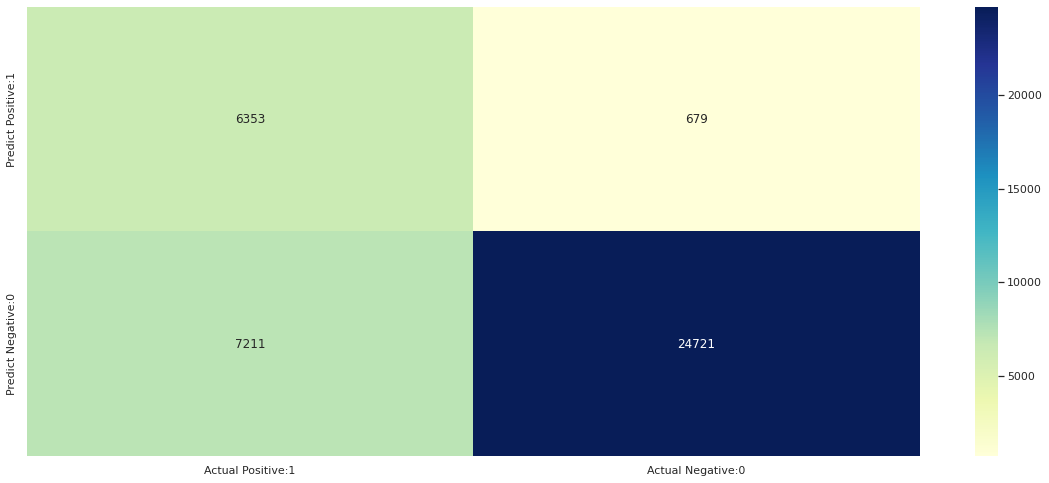

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# visualizando a matriz de confusão com seaborn heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Métricas de classificação

In [ ]:
# o reporte de classificação é outro método de avaliar a perfomance do modelo de classificação
# ele nos mostra as pontuações de precisão, recall, f1 e support do modelo

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  First-time       0.47      0.90      0.62      7032
   Returning       0.97      0.77      0.86     31932

    accuracy                           0.80     38964
   macro avg       0.72      0.84      0.74     38964
weighted avg       0.88      0.80      0.82     38964

